In [136]:
# Import List
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelBinarizer
import numpy as np

import pandas as pd


# 实验2

## 标准BP算法

首先需要对数据进行归一化处理，便于神经网络的使用。

In [137]:
# 读取所有数据（不包括第一行参数）
wine_data = np.genfromtxt('wine_data.csv', delimiter=',', skip_header=1)

# 读取所有特征数据，排除最后一列（列标签）
X = wine_data[:, 0:13]
# 标签列读取
y = wine_data[:, 13]

# 划分70%训练集，30%测试集
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7)
# 数据标准化
label_train = LabelBinarizer().fit_transform(y_train)

设置神经网络参数。包括学习率、迭代次数、神经节点设置。

In [138]:
# 学习率
rate = 0.11
# 迭代次数
step = 10000

# 随机设置神经权值，13输入，3输出中间隐藏层100个神经元
v = np.random.random((13, 100)) * 2 - 1  # 输入层->隐层
w = np.random.random((100, 3)) * 2 - 1  # 隐层->输出层

激活函数$sigmoid()$与其导数函数如下。

In [139]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def de_sigmoid(x):
    return x * (1 - x)

创建训练函数
标准BP算法核心要点如下：
```
Algorithms 标准BP算法
----
    输入： 训练集 D，学习率 η.
    过程：
        1. 随即初始化连接权与阈值 (ω，θ).
        2. Repeat：
        3.   for x_k，y_k in D:
        4.     根据当前参数计算出样本误差 E_k.
        5.     根据公式计算出随机梯度项 g_k.
        6.     根据公式更新 (ω，θ).
        7.   end for
        8. until 达到停止条件
    输出：(ω，θ) - 即相应的多层前馈神经网络.
----
```

In [140]:
def standard_bp_train(train_x, train_y, train_rate, train_step):
    # 导入神经节点
    global v, w
    for n in range(train_step + 1):
        # 随机选择样本
        i = np.random.randint(train_x.shape[0])
        x = train_x[i]
        x = np.atleast_2d(x)

        # 节点激活
        L1 = sigmoid(np.dot(x, v))  # 输入层->隐层
        L2 = sigmoid(np.dot(L1, w))  # 隐层->输出层

        # 误差反向反馈
        L2_delta = (train_y[i] - L2) * de_sigmoid(L2)  # 输出层->隐层
        L1_delta = L2_delta.dot(w.T) * de_sigmoid(L1)  # 隐层->输入层

        # 权值更新
        w = w + train_rate * L1.T.dot(L2_delta)  # 隐层->输出层
        v = v + train_rate * x.T.dot(L1_delta)  # 输入层->隐层

        # 每1000次训练对网络进行测试，输出测试准确率
        if n % 1000 == 0:
            output = predict(x_test)
            predictions = np.argmax(output, axis=1)  # 选择概率最大的输出点作为结果，输出所在列编号，对应分类结果
            acc = np.mean(np.equal(predictions, y_test))  # 对比测试样本，求准确率
            print("step:", n, "acc:", acc)


def predict(x):
    L1 = sigmoid(np.dot(x, v))
    L2 = sigmoid(np.dot(L1, w))
    return L2


standard_bp_train(x_train, label_train, rate, step)

/tmp/ipykernel_11623/174309813.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


step: 0 acc: 0.2222222222222222
step: 1000 acc: 0.2222222222222222
step: 2000 acc: 0.2222222222222222
step: 3000 acc: 0.2222222222222222
step: 4000 acc: 0.2222222222222222
step: 5000 acc: 0.2222222222222222
step: 6000 acc: 0.2222222222222222
step: 7000 acc: 0.2222222222222222
step: 8000 acc: 0.2222222222222222
step: 9000 acc: 0.2222222222222222
step: 10000 acc: 0.2222222222222222


通过运行标准BP算法可以发现，单层神经网络中神经点之间的权重在每次放入样本训练后都会发生改变，改变次数与训练次数相关，即：标准BP算法更新规则是基于每次样本而去修改。

## 累计BP算法

累计BP算法实现步骤如下：
```
Algorithms 累积BP算法
----
    输入： 训练集 D，学习率 η，迭代次数 n.
    过程：
        1. 随即初始化连接权与阈值 (ω，θ).
        2. Repeat：
        3.     根据当前参数计算出累积误差 E.
        4.     根据公式计算出标准梯度项 g.
        5.     根据公式更新 (ω，θ).
        6.     n = n-1
        7. until n=0 or 达到停止条件
    输出：(ω，θ) - 即相应的多层前馈神经网络.
----
```

In [141]:
# 随机设置神经权值，13输入，3输出中间隐藏层100个神经元
v1 = np.random.random((13, 100)) * 2 - 1  # 输入层->隐层
w1 = np.random.random((100, 3)) * 2 - 1  # 隐层->输出层

def sum_bp_train(train_x, train_y, train_rate, train_step):
    global v1, w1
    return

def acc_BP(x,y,q,N,k):
    L=y.shape[1]
    n=x.shape[1]
    v=np.matrix(np.random.rand(n,q))
    r=np.matrix(np.random.rand(1,q))
    w=np.matrix(np.random.rand(q,L))
    h=np.matrix(np.random.rand(1,L))
    b=np.matrix(np.zeros((x.shape[0],q)))
    g=np.matrix(np.zeros((x.shape[0],n)))
    e=np.matrix(np.zeros((x.shape[0],q)))

    y_hat = np.matrix(np.zeros((x.shape[0],L)))
    iter=1
    while iter<N:
        for index in range(x.shape[0]):
            A=np.dot(x[index],v)
            b[index]=sigmoid(A-r)

            B = np.dot(b[index],w)
            y_hat[index]=sigmoid(B-h)

            g[index]=np.multiply(np.multiply(y_hat[index],(1-y_hat[index])),y[index]-y_hat[index])
            e[index]=np.multiply(np.multiply(b[index],(1-b[index])),(w*g[index].T).T)
        #以下对各个系数进行调整
        #对上述的一些系数调整至取均值
        b_bar=b.mean(axis=0)
        g_bar=g.mean(axis=0)
        e_bar=e.mean(axis=0)
        x_bar=x.mean(axis=0)

        for i in range(n):
            for j in range(q):
                v[i,j]=v[i,j]+k*e_bar[0,j]*x_bar[0,i]
        r=r-k*e_bar

        for i in range(q):
            for j in range(L):
                w[i,j]=w[i,j]+k*g_bar[0,j]*b_bar[0,i]
        h=h-k*g_bar
        iter=iter+1
    print('输入层到隐层的权值为:')
    print(v)
    print('隐层的阀值为：')
    print(r)
    print('隐层到输出层的权值为:')
    print(w)
    print('输出层的阀值为：')
    print(h)
    print('样本y的值')
    print(y)
    print('训练后能得到y_hat的值')
    print(y_hat)


## 构建神经网络

使用TensorFlow搭建神经网络。本次使用工具Keras构建神经网络，后端使用TensorFlow训练。

In [142]:
# Import List
import tensorflow as tf
import seaborn as sns
from sklearn.metrics import confusion_matrix, f1_score, precision_score
from matplotlib import pyplot as plt

导入数据，并划分训练集与测试集。
其中，数据分割函数`train_test_split`中的`stratify`参数保证了训练集与测试集的葡萄酒品类比例与总样本中的比例相同。`shuffle`参数让数据进行分割前进行洗牌操作。

In [143]:
# 读取所有数据（不包括第一行参数）
wine_data_tf = np.genfromtxt('wine_data.csv', delimiter=',', skip_header=1)
# 读取所有特征数据，排除最后一列（列标签）
X_tf = wine_data_tf[:, 0:13]
# 标签列读取
y_tf = wine_data_tf[:, 13]

# 数据归一化
scaler = StandardScaler()
X_scaler = scaler.fit_transform(X_tf)

# 划分训练集测试集
x_train_tf, x_test_tf, y_train_tf, y_test_tf = train_test_split(X_scaler, y_tf, stratify=y, random_state=42, test_size=0.1, shuffle=True)
# 数据标准化
label_train_tf = LabelBinarizer().fit_transform(y_train_tf)

创建TensorFlow神经网络，设置输入层、隐藏层和输出层的大小。Keras提供了非常直观的网络搭建方法，实验中使用`keras.Sequential()`序列化方法搭建网络。网络中按照顺序依次设置隐层网络的个数、激活函数，定义输入、输出口数量。
这里首先搭建了$13\times 16\times 50\times 10\times3$的神经网络，隐层使用`Relu`激活函数。学习率设置为0.001，训练轮数为50，每轮训练进入的数据量为32。
其次还需要设置网络的相应学习参数，包括了网络所用的损失函数、优化器等。

In [144]:
# 使用keras的层堆叠创建神经网络，包含输入层、隐层和输出层
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu', input_shape=[13]),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(3)
])

# 参数设置
LEARNING_RATE = 0.001  # 学习率
EPOCHS = 50  # 训练轮数
BATCH_SIZE = 32  # 每轮训练进入的数据量

# 通过compile调整网络学习参数
model_1.compile(
    # 优化器
    optimizer=tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE),
    # 损失函数
    loss='mse',
    # 评估函数
    metrics=['mae'])

向模型输入数据进行训练

In [145]:
history_1 = model_1.fit(x_train_tf, y_train_tf,
                        batch_size=BATCH_SIZE,
                        epochs=EPOCHS,
                        validation_data=(x_test_tf, y_test_tf),
                        validation_freq=1)

model_1.summary()

Epoch 1/50
5/5 [==============================] - 2s 114ms/step - loss: 1.5809 - mae: 1.0760 - val_loss: 1.5116 - val_mae: 1.0554
Epoch 2/50
5/5 [==============================] - 0s 19ms/step - loss: 1.3485 - mae: 0.9752 - val_loss: 1.2866 - val_mae: 0.9589
Epoch 3/50
5/5 [==============================] - 0s 19ms/step - loss: 1.1762 - mae: 0.8925 - val_loss: 1.1073 - val_mae: 0.8739
Epoch 4/50
5/5 [==============================] - 0s 18ms/step - loss: 1.0318 - mae: 0.8215 - val_loss: 0.9652 - val_mae: 0.8064
Epoch 5/50
5/5 [==============================] - 0s 20ms/step - loss: 0.9056 - mae: 0.7594 - val_loss: 0.8401 - val_mae: 0.7455
Epoch 6/50
5/5 [==============================] - 0s 18ms/step - loss: 0.7993 - mae: 0.7035 - val_loss: 0.7175 - val_mae: 0.6782
Epoch 7/50
5/5 [==============================] - 0s 18ms/step - loss: 0.6874 - mae: 0.6450 - val_loss: 0.5986 - val_mae: 0.6092
Epoch 8/50
5/5 [==============================] - 0s 19ms/step - loss: 0.5825 - mae: 0.5910 - va

结果可视化，输出每轮训练后均方误差、损失函数随次数变化后的曲线。

In [146]:
def plot_results(history):
    '''
    history: 模型训练后返回的训练结果
    '''
    # 显示MAE
    plt.figure(figsize=(10, 10))
    epoch_range = range(1, EPOCHS + 1)  # 横轴范围
    plt.plot(epoch_range, history.history['mae'], label = 'train_mae')
    plt.plot(epoch_range, history.history['val_mae'], label = 'val_mae')
    plt.title("MAE")
    plt.xlabel("Epoch")
    plt.ylabel("mae")
    plt.legend(loc = 'best')
    plt.show()

    # 显示LOSS
    plt.figure(figsize=(10, 10))
    plt.plot(epoch_range, history.history['loss'], label = 'train_loss')
    plt.plot(epoch_range, history.history['val_loss'], label = 'val_moss')
    plt.title("LOSS")
    plt.xlabel("Epoch")
    plt.ylabel("loss")
    plt.legend(loc = 'best')
    plt.show()


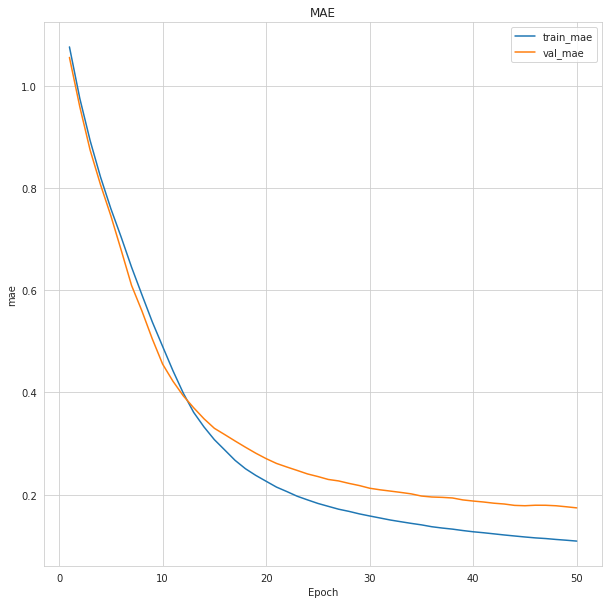

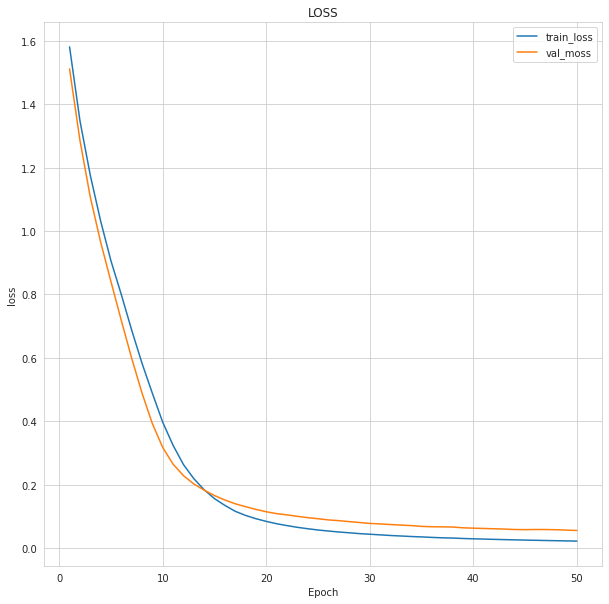

In [147]:
plot_results(history_1)

使用测试数据对模型进行验证。

In [148]:
def model_evaluation(model):
    eval_loss, eval_mae = model.evaluate(x_test_tf, y_test_tf, batch_size = BATCH_SIZE, verbose = 1)
    print("验证损失：", eval_loss)
    print("验证mae", eval_mae)

model_evaluation(model_1)

1/1 [==============================] - 0s 53ms/step - loss: 0.0552 - mae: 0.1739
验证损失： 0.05521231144666672
验证mae 0.17388075590133667


输出模型的混淆函数，准确率。

F1_Score:  0.4366744366744366


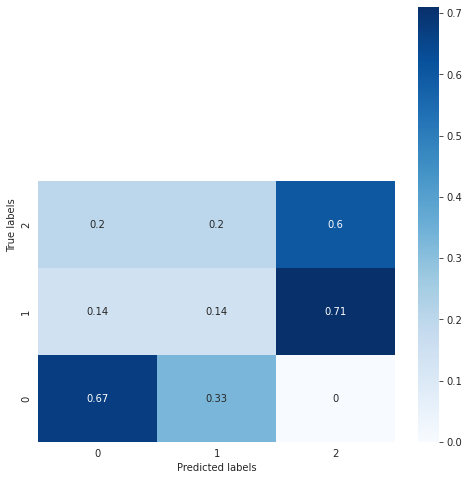

In [149]:
# y_pred = model.predict_classes(x_test_tf) # TF中新版本已经弃用此方法，使用下面方法获取测试数据
predict_x=model_1.predict(x_test_tf)
y_pred=np.argmax(predict_x,axis=1)
print("F1_Score: ", f1_score(y_test_tf, y_pred, average="macro"))
con_mat = confusion_matrix(y_test_tf, y_pred)
con_mat_norm = con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis]  # 归一化
con_mat_norm = np.around(con_mat_norm, decimals=2)

# 绘制混淆矩阵
plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_norm, annot=True, cmap='Blues')

plt.ylim(0, 5)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

改变隐藏层网络，这里创建规格为$13\times 32\times 100\times 64\times3$的神经网络，保持其他条件不变，训练并测试该神经网络。

In [150]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=[13]),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(3)
])

model_2.compile(
    # 优化器
    optimizer=tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE),
    # 损失函数
    loss='mse',
    # 评估函数
    metrics=['mae'])

history_2 = model_2.fit(x_train_tf, y_train_tf,
                        batch_size=BATCH_SIZE,
                        epochs=EPOCHS,
                        validation_data=(x_test_tf, y_test_tf),
                        validation_freq=1)

model_2.summary()

Epoch 1/50
5/5 [==============================] - 1s 94ms/step - loss: 1.6528 - mae: 1.0451 - val_loss: 1.4779 - val_mae: 0.9616
Epoch 2/50
5/5 [==============================] - 0s 19ms/step - loss: 1.4186 - mae: 0.9426 - val_loss: 1.3009 - val_mae: 0.8905
Epoch 3/50
5/5 [==============================] - 0s 24ms/step - loss: 1.2566 - mae: 0.8744 - val_loss: 1.1671 - val_mae: 0.8263
Epoch 4/50
5/5 [==============================] - 0s 20ms/step - loss: 1.1350 - mae: 0.8204 - val_loss: 1.0484 - val_mae: 0.7697
Epoch 5/50
5/5 [==============================] - 0s 20ms/step - loss: 1.0150 - mae: 0.7667 - val_loss: 0.9349 - val_mae: 0.7134
Epoch 6/50
5/5 [==============================] - 0s 22ms/step - loss: 0.8966 - mae: 0.7068 - val_loss: 0.8257 - val_mae: 0.6610
Epoch 7/50
5/5 [==============================] - 0s 19ms/step - loss: 0.7662 - mae: 0.6410 - val_loss: 0.7110 - val_mae: 0.6048
Epoch 8/50
5/5 [==============================] - 0s 18ms/step - loss: 0.6420 - mae: 0.5721 - val

新模型结果可视化，输出每轮训练后均方误差、损失函数随次数变化后的曲线。

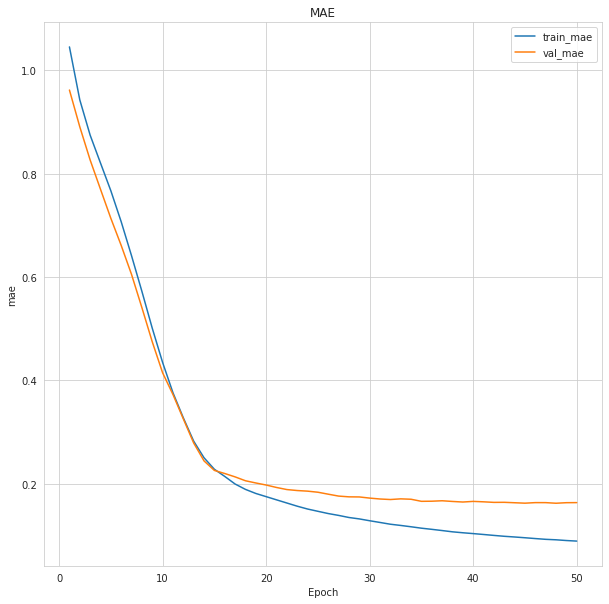

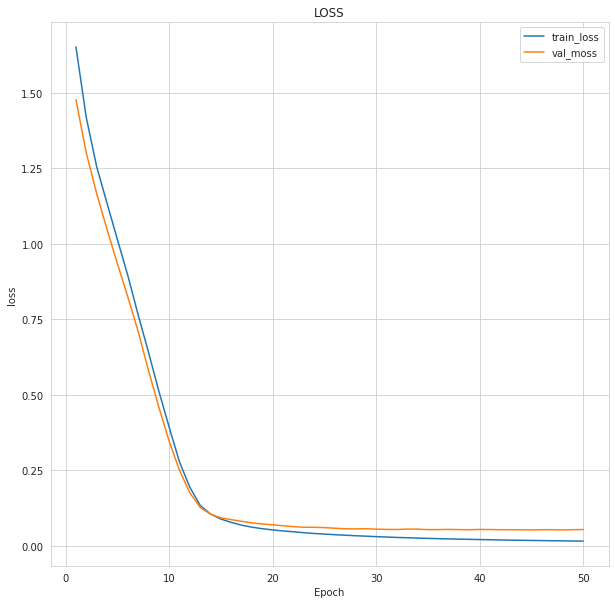

In [151]:
plot_results(history_2)

输出新模型混淆矩阵

1/1 [==============================] - 0s 50ms/step - loss: 0.0552 - mae: 0.1739
验证损失： 0.05521231144666672
验证mae 0.17388075590133667
F1_Score:  0.4329004329004329


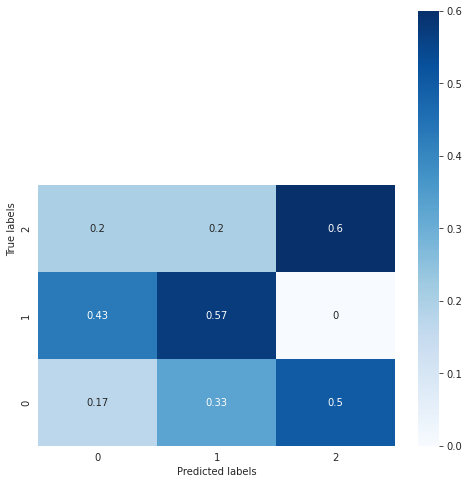

In [152]:
model_evaluation(model_1)

predict_x_2=model_2.predict(x_test_tf)
y_pred_2=np.argmax(predict_x_2,axis=1)
print("F1_Score: ", f1_score(y_test_tf, y_pred_2, average="macro"))
con_mat = confusion_matrix(y_test_tf, y_pred_2)
con_mat_norm = con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis]  # 归一化
con_mat_norm = np.around(con_mat_norm, decimals=2)

# 绘制混淆矩阵
plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_norm, annot=True, cmap='Blues')

plt.ylim(0, 5)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()